# K MEANS SPOTIFY

In [77]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [78]:
df = pd.read_csv('nelson_data.csv')
songs = df.loc[:, "song_title"]
df = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
         'instrumentalness', 'liveness', 'valence', 'tempo']]
len(df.columns)

9

In [79]:
df = pd.read_csv('nelson_data.csv')
df = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
         'instrumentalness', 'liveness', 'valence', 'tempo']]
print(df.columns, "\n", df.columns)
len(df.columns)

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object') 
 Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')


9

In [80]:
## scale the data
scaler = StandardScaler()
scaler.fit(df)

x = scaler.transform(df)
x = pd.DataFrame(x, columns = df.columns)
x.index = songs
x

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
song_title,,,,,,,,,
Hey Ya!,0.412458,1.243718,0.435773,-0.351565,-0.832068,-0.272392,0.537669,1.710659,-1.206217
"No Woman, No Cry",1.532356,-1.266519,-1.571073,0.539105,-0.903582,-0.272147,0.394438,-0.656408,-0.877411
Can You Feel It,1.804924,0.139574,0.241589,-0.385614,-0.800136,-0.269454,-0.035256,1.418233,0.369488
Foolish,0.193218,0.423497,0.727330,-0.263752,0.102935,-0.272392,-0.338245,0.940078,-0.840694
Arigato Interlude,-3.480523,1.671855,-0.362632,-0.822885,1.709504,-0.258316,4.090906,-2.106681,-3.928167
...,...,...,...,...,...,...,...,...,...
XO,-0.926680,-1.036677,-0.401468,-0.564823,1.543193,-0.272392,0.014324,-0.711732,2.025724
Un-Break My Heart,0.193218,-0.856409,-0.236271,-0.566615,0.432232,-0.272392,-0.605977,-1.581105,-0.160352
God Is a DJ,0.098412,1.288785,0.238212,-0.416976,-0.366063,5.284192,-0.283156,-0.660360,0.547622


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

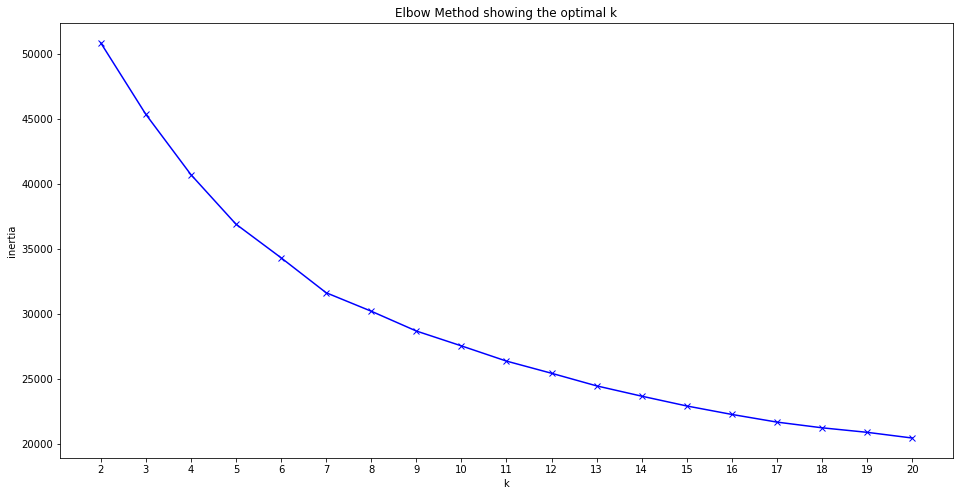

In [63]:
## FIND BEST K - ELBOW METHOD
K = range(2, 21)
inertia = []

for k in K:
    #print("Training a K-Means model with {} clusters! ".format(k))
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

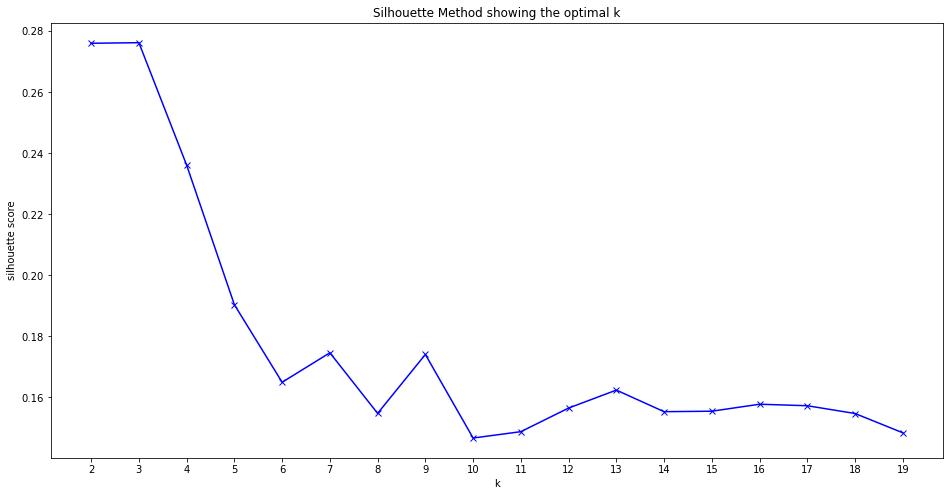

In [64]:
## FIND BEST K - SILHOUETTE METHOD
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(x)
    
    filename = "kmeans_tommella" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(x, kmeans.predict(x)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [65]:
x

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
song_title,,,,,,,,,
Hey Ya!,0.412458,1.243718,0.435773,-0.351565,-0.832068,-0.272392,0.537669,1.710659,-1.206217
"No Woman, No Cry",1.532356,-1.266519,-1.571073,0.539105,-0.903582,-0.272147,0.394438,-0.656408,-0.877411
Can You Feel It,1.804924,0.139574,0.241589,-0.385614,-0.800136,-0.269454,-0.035256,1.418233,0.369488
Foolish,0.193218,0.423497,0.727330,-0.263752,0.102935,-0.272392,-0.338245,0.940078,-0.840694
Arigato Interlude,-3.480523,1.671855,-0.362632,-0.822885,1.709504,-0.258316,4.090906,-2.106681,-3.928167
...,...,...,...,...,...,...,...,...,...
XO,-0.926680,-1.036677,-0.401468,-0.564823,1.543193,-0.272392,0.014324,-0.711732,2.025724
Un-Break My Heart,0.193218,-0.856409,-0.236271,-0.566615,0.432232,-0.272392,-0.605977,-1.581105,-0.160352
God Is a DJ,0.098412,1.288785,0.238212,-0.416976,-0.366063,5.284192,-0.283156,-0.660360,0.547622


In [66]:
## K MEANS
kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(x)

KMeans(n_clusters=6, random_state=1234)

In [67]:
kmeans.labels_

array([5, 4, 5, ..., 2, 1, 4])

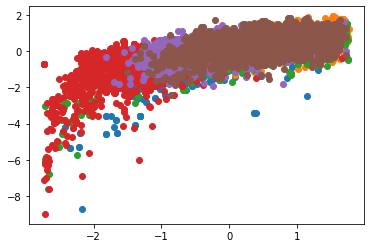

In [68]:
# assign a cluster to each example
labels = kmeans.predict(x)
clusters = np.unique(labels)
for cluster in clusters:
    row_ix = np.where(labels == cluster)
    pyplot.scatter(x.to_numpy()[row_ix, 1], x.to_numpy()[row_ix, 2])
pyplot.show()

In [69]:
clusters = kmeans.predict(x)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     620
1    1229
2     325
3    1097
4    1567
5    2479
dtype: int64

In [70]:
x["cluster"] = clusters
x

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
song_title,,,,,,,,,,
Hey Ya!,0.412458,1.243718,0.435773,-0.351565,-0.832068,-0.272392,0.537669,1.710659,-1.206217,5
"No Woman, No Cry",1.532356,-1.266519,-1.571073,0.539105,-0.903582,-0.272147,0.394438,-0.656408,-0.877411,4
Can You Feel It,1.804924,0.139574,0.241589,-0.385614,-0.800136,-0.269454,-0.035256,1.418233,0.369488,5
Foolish,0.193218,0.423497,0.727330,-0.263752,0.102935,-0.272392,-0.338245,0.940078,-0.840694,5
Arigato Interlude,-3.480523,1.671855,-0.362632,-0.822885,1.709504,-0.258316,4.090906,-2.106681,-3.928167,3
...,...,...,...,...,...,...,...,...,...,...
XO,-0.926680,-1.036677,-0.401468,-0.564823,1.543193,-0.272392,0.014324,-0.711732,2.025724,3
Un-Break My Heart,0.193218,-0.856409,-0.236271,-0.566615,0.432232,-0.272392,-0.605977,-1.581105,-0.160352,4
God Is a DJ,0.098412,1.288785,0.238212,-0.416976,-0.366063,5.284192,-0.283156,-0.660360,0.547622,2


In [71]:
import seaborn as sns
x2 = x.reset_index(drop=True)
#sns.pairplot(x2, hue="cluster")

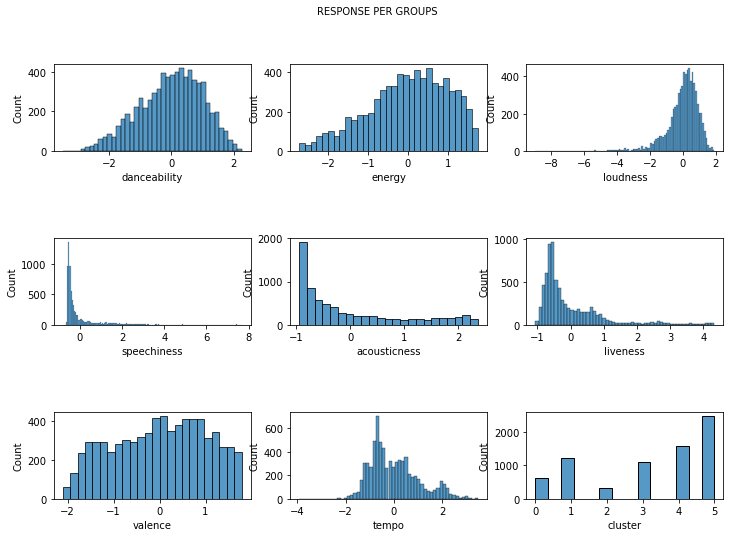

In [72]:
## DISTRIBUTIONS
fig, ax = plt.subplots(3,3, figsize=(12,8))
fig.suptitle("RESPONSE PER GROUPS", fontsize=10)
var = x2.columns

sns.histplot(data=x2, x='danceability', ax=ax[0,0])
sns.histplot(data=x2, x='energy', ax=ax[0,1])
sns.histplot(data=x2, x='loudness', ax=ax[0,2])
sns.histplot(data=x2, x='speechiness', ax=ax[1,0])
sns.histplot(data=x2, x='acousticness', ax=ax[1,1])
sns.histplot(data=x2, x=var[6], ax=ax[1,2])
sns.histplot(data=x2, x=var[7], ax=ax[2,0])
sns.histplot(data=x2, x=var[8], ax=ax[2,1])
sns.histplot(data=x2, x=var[9], ax=ax[2,2])

fig.subplots_adjust(hspace=1)

In [73]:
a_median = x2['acousticness'].median()

In [81]:
### SAVE MODEL AND SCALER
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("scaler_tommella.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("kmeans_tommella.pickle", "wb") as f:
    pickle.dump(kmeans,f)


## SONG INPUT

select_song = input('Please enter your song: ')

if select_song.lower() in str(list(df["Songs"])).lower():
    r = randint(0, len(df.index))
    print("Other song recommended: ", df.iloc[r, 1])
else:
    print("THE SONG SELECTED IS NOT IN THE DATABASE")


In [82]:
x2.to_csv("database_clustered.csv")
x2['song'] = 

In [76]:
x2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.412458,1.243718,0.435773,-0.351565,-0.832068,-0.272392,0.537669,1.710659,-1.206217,5
1,1.532356,-1.266519,-1.571073,0.539105,-0.903582,-0.272147,0.394438,-0.656408,-0.877411,4
2,1.804924,0.139574,0.241589,-0.385614,-0.800136,-0.269454,-0.035256,1.418233,0.369488,5
3,0.193218,0.423497,0.727330,-0.263752,0.102935,-0.272392,-0.338245,0.940078,-0.840694,5
4,-3.480523,1.671855,-0.362632,-0.822885,1.709504,-0.258316,4.090906,-2.106681,-3.928167,3
...,...,...,...,...,...,...,...,...,...,...
7312,-0.926680,-1.036677,-0.401468,-0.564823,1.543193,-0.272392,0.014324,-0.711732,2.025724,3
7313,0.193218,-0.856409,-0.236271,-0.566615,0.432232,-0.272392,-0.605977,-1.581105,-0.160352,4
7314,0.098412,1.288785,0.238212,-0.416976,-0.366063,5.284192,-0.283156,-0.660360,0.547622,2
7315,-0.505978,1.140064,-0.260193,-0.573784,-0.907241,1.209364,0.041869,0.102318,-0.068440,1
